In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
timeO = []
timeC = []
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    T = track['mouse_positionMS'].shape[0]
    TO = behav['o1Ind'].size + behav['o2Ind'].size
    TC = behav['c1Ind'].size + behav['c2Ind'].size
    timeO.append(TO/T)
    timeC.append(TC/T)
timeO = np.array(timeO)*100
timeC = np.array(timeC)*100

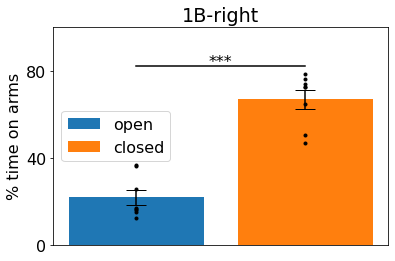

In [4]:
plt.bar(0, np.mean(timeO))
plt.bar(1, np.mean(timeC))
plt.plot(np.zeros(8), timeO, 'k.', label='_nolegend_')
plt.plot(np.ones(8), timeC, 'k.', label='_nolegend_')

plt.ylim(0, 100)
plt.yticks([0, 40, 80])
plt.xticks([])
plt.legend(['open', 'closed'])
plt.ylabel('% time on arms')
plt.plot([0, 1], [82, 82], 'k')
plt.text(0.5, 82, '***', ha='center')

plt.errorbar(0, np.mean(timeO), sem(timeO), fmt='k_', ms=0, capsize=10)
plt.errorbar(1, np.mean(timeC), sem(timeC), fmt='k_', ms=0, capsize=10)
plt.title('1B-right')
plt.savefig('./elife_figs/1B_right.svg')

In [6]:
from scipy.stats import wilcoxon

In [7]:
wilcoxon(timeO, timeC)

WilcoxonResult(statistic=0.0, pvalue=0.0078125)

In [9]:
from scipy.stats import ttest_ind

In [10]:
ttest_ind(timeO, timeC)

Ttest_indResult(statistic=-8.159400175640751, pvalue=1.087631639449387e-06)

In [4]:
np.mean(timeO)

21.92665917137156

In [5]:
sem(timeO)

3.4784817849768563

In [6]:
np.mean(timeC)

66.93171973959502

In [7]:
sem(timeC)

4.2805908995636415

In [8]:
timeO

array([16.62799691, 15.98451327, 12.10490921, 36.30304377, 36.78350515,
       25.84294587, 16.87014428, 14.8962149 ])

In [9]:
timeC

array([72.41188819, 76.25      , 78.42412015, 50.29993335, 46.65979381,
       64.61845608, 72.79689234, 73.99267399])

In [10]:
ranksums(timeO, timeC)

RanksumsResult(statistic=-3.3606722016672235, pvalue=0.0007775304469403846)